In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

  # Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


In [ ]:
!kaggle datasets download -d shuvokumarbasakbd/brain-tumors-mri-crystal-clean-colorized-mri-data

Dataset URL: https://www.kaggle.com/datasets/shuvokumarbasakbd/brain-tumors-mri-crystal-clean-colorized-mri-data
License(s): MIT
 98% 83.0M/85.0M [00:00<00:00, 231MB/s]
100% 85.0M/85.0M [00:00<00:00, 211MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/brain-tumors-mri-crystal-clean-colorized-mri-data.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm

dirs=['/content/dataset/test','/content/dataset/train','/content/dataset/validation']
X = []
y = []
for dir in dirs:
  os.chdir(dir+'/Normal')
  for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      if img is not None: # Add this check
          img = cv2.resize(img,(224,224))
          X.append(img)
          y.append('Normal')
          # print(i[0:1])
  os.chdir(dir+'/glioma_tumor')
  for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      if img is not None: # Add this check
          img = cv2.resize(img,(224,224))
          X.append(img)
          y.append('glioma_tumor')

  os.chdir(dir+'/meningioma_tumor')
  for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      if img is not None: # Add this check
          img = cv2.resize(img,(224,224))
          X.append(img)
          y.append('meningioma_tumor')

  os.chdir(dir+'/pituitary_tumor')
  for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      if img is not None: # Add this check
          img = cv2.resize(img,(224,224))
          X.append(img)
          y.append('pituitary_tumor')
  # for i in range(1,99):
  #     y.append('N')
print(y)
%matplotlib inline

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',

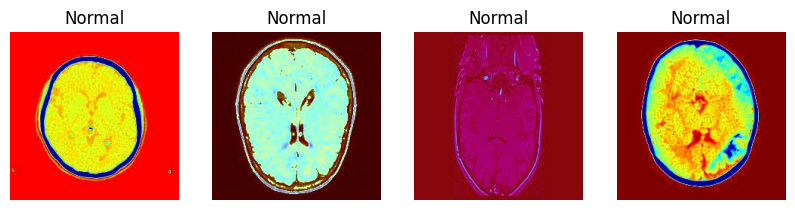

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.title(y[i])
    plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)

y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)
X_train Shape:  (3752, 224, 224, 3)
X_test Shape:  (1848, 224, 224, 3)
y_train Shape:  (3752, 4)
y_test Shape:  (1848, 4)


## **Recherche par image**

In [ ]:

os.chdir('/content')
os.mkdir('requested_images')

In [ ]:
os.chdir('/content/requested_images')

In [ ]:
X_Requested = []
Y_Requested = []

# Select and append the first two images and labels
X_Requested.append(X[0])
X_Requested.append(X[1])
Y_Requested.append(y[0])
Y_Requested.append(y[1])

# Remove the first two elements from X and y
X = X[2:]
y = y[2:]

print("Number of images in X_Requested:", len(X_Requested))
print("Number of labels in Y_Requested:", len(Y_Requested))
print("Number of images remaining in X:", len(X))
print("Number of labels remaining in y:", len(y))

Number of images in X_Requested: 2
Number of labels in Y_Requested: 2
Number of images remaining in X: 5598
Number of labels remaining in y: 5598


In [ ]:
current_directory = os.getcwd()
print(f"Saving images to: {current_directory}")

for i, img in enumerate(X_Requested):
  filename = f"requested_image_{i}.jpg"
  filepath = os.path.join(current_directory, filename)
  cv2.imwrite(filepath, img)

print("Images saved successfully.")

Saving images to: /content/requested_images
Images saved successfully.


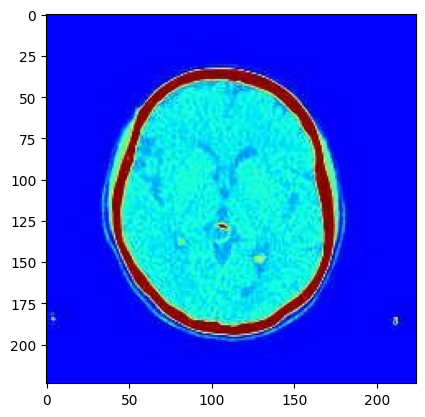

In [ ]:
from matplotlib import image
img_requete = image.imread('/content/requested_images/requested_image_0.jpg')
plt.imshow(img_requete)

In [ ]:
# Comparer les pixels des deux images utilisant une distance enculidienne
import scipy.spatial.distance as dist
distances = {}
for i in range (len(X)):
  distances[i]=dist.euclidean(img_requete.flatten(), X[i].flatten())
distances = sorted([(v, k) for (k, v) in distances.items()])
print(distances)

[(np.float64(52458.078367397335), 1048), (np.float64(53428.470659377854), 1283), (np.float64(53599.53605209657), 4877), (np.float64(55550.12212407818), 3048), (np.float64(56113.22124954154), 2449), (np.float64(56446.405820034284), 3907), (np.float64(56473.115444430725), 2947), (np.float64(56568.23417784932), 2306), (np.float64(56683.80014607348), 2297), (np.float64(56720.304882819524), 3635), (np.float64(56840.70371661491), 1520), (np.float64(56978.224998678226), 338), (np.float64(56982.585936406926), 2701), (np.float64(57073.447635481076), 2035), (np.float64(57074.491535185836), 595), (np.float64(57117.37584133221), 2220), (np.float64(57157.67664977295), 1565), (np.float64(57265.34455497496), 5567), (np.float64(57372.33857008097), 450), (np.float64(57450.402096068916), 261), (np.float64(57472.48854017024), 4923), (np.float64(57565.7651212941), 3308), (np.float64(57682.545548892), 1721), (np.float64(57703.45228840299), 5209), (np.float64(57706.09036314971), 1801), (np.float64(57783.074

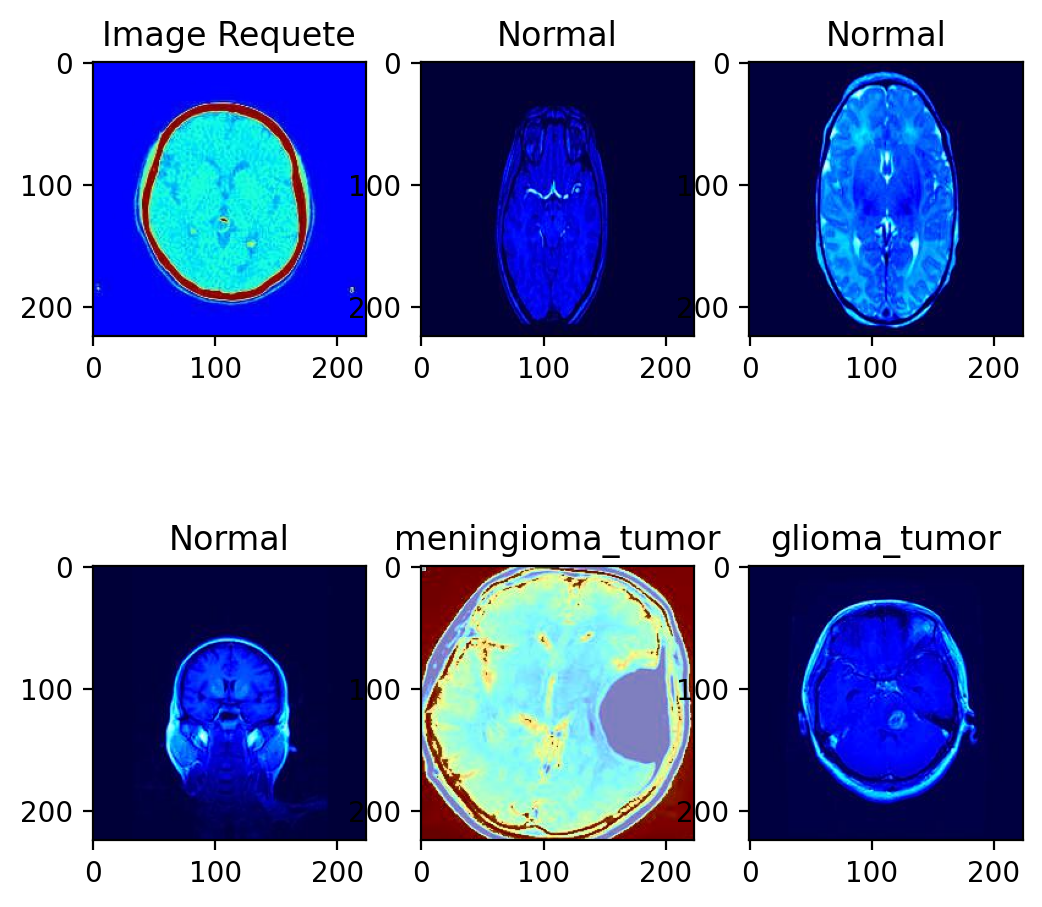

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(X[distances[i][1]])
  ax1.set_title('%s' %(y[distances[i][1]]))

## **Recherche par couleur**

Debut dIndexation
Fin dIndexation
[(0.3027181218137025, 5480), (0.3320665909277128, 3809), (0.3806015593114223, 1421), (0.4802555943844931, 3194), (0.5046321290282118, 3548), (0.5279198892713339, 5014), (0.5438313258712876, 1114), (0.5707508445941117, 3462), (0.5755940768192099, 1645), (0.5833997544183552, 3560), (0.5864723434313511, 4834), (0.5939909422225195, 4787), (0.6236137239580778, 1911), (0.6350355153903442, 816), (0.6509296239854242, 3459), (0.6525612975222006, 1635), (0.6810738487237409, 437), (0.6847675267569224, 4885), (0.6894513945994525, 1428), (0.6983476939805265, 846), (0.7184977217980435, 3025), (0.7289874250333743, 1390), (0.7309470649912398, 1479), (0.7434227265287346, 5462), (0.7697853508708655, 4441), (0.7743315603466201, 3031), (0.7751702975582173, 1776), (0.7923196152535157, 486), (0.8004156347092047, 1816), (0.8035052427818458, 1332), (0.8242864111632643, 3601), (0.8410817227604585, 1984), (0.8457696632354099, 3240), (0.8568012725663536, 926), (0.865278300187698

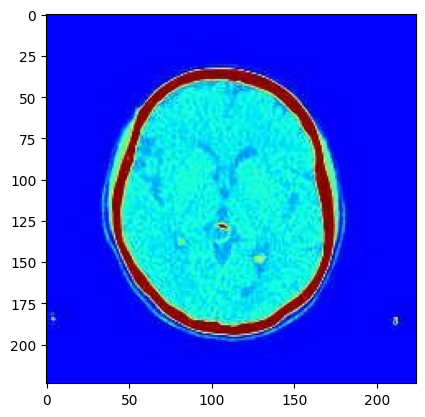

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image # Import image from matplotlib

def color_Moments(img):
  R = img[..., 0]
  G = img[..., 1]
  B = img[..., 2]
  colorFeatures = [np.mean(R),np.std(R),np.mean(G),np.std(G),np.mean(B),np.std(B)]
  colorFeatures /= np.mean(colorFeatures)
  return colorFeatures

def getFeatures(img, fsize):
    return color_Moments(img)

def CBIR_Indexation(fsize):
  n=len(X)
  features=[];
  print('Debut d''Indexation')
  for i in range (n):
      features.append(getFeatures(X[i],fsize))
  print('Fin d''Indexation');
  return features

def CBIR_Recherche(Imreq,ind_Matrix):
  fsize = ind_Matrix[0].shape[0]+1
  features=getFeatures(Imreq,fsize)
  distances = list()
  for index, im in enumerate(ind_Matrix):
    distances.append((dist.euclidean(features, im),index))
  distances.sort()
  return distances

index_Matrix=CBIR_Indexation(len(X))

# Use the locally saved image
img_requete = image.imread('/content/requested_images/requested_image_0.jpg')
plt.imshow(img_requete)
distanes_CBIR=CBIR_Recherche(img_requete,index_Matrix)
print(distanes_CBIR)

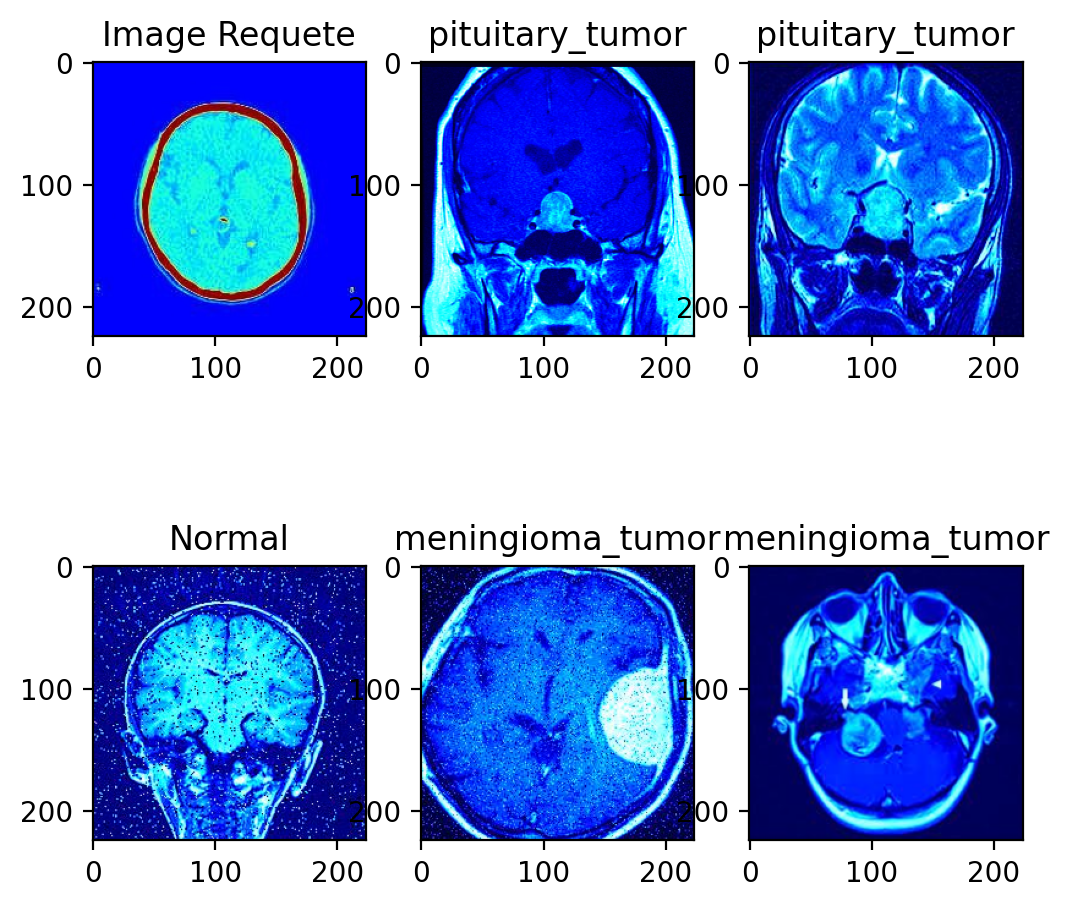

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(X[distanes_CBIR[i][1]])
  ax1.set_title('%s' %(y[distanes_CBIR[i][1]]))

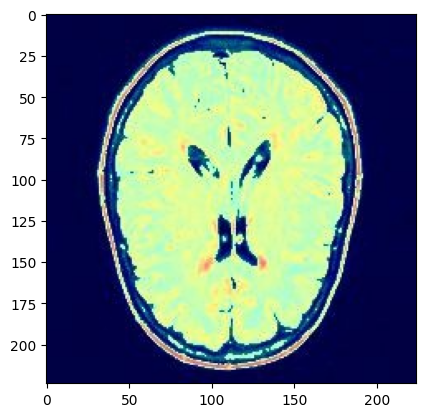

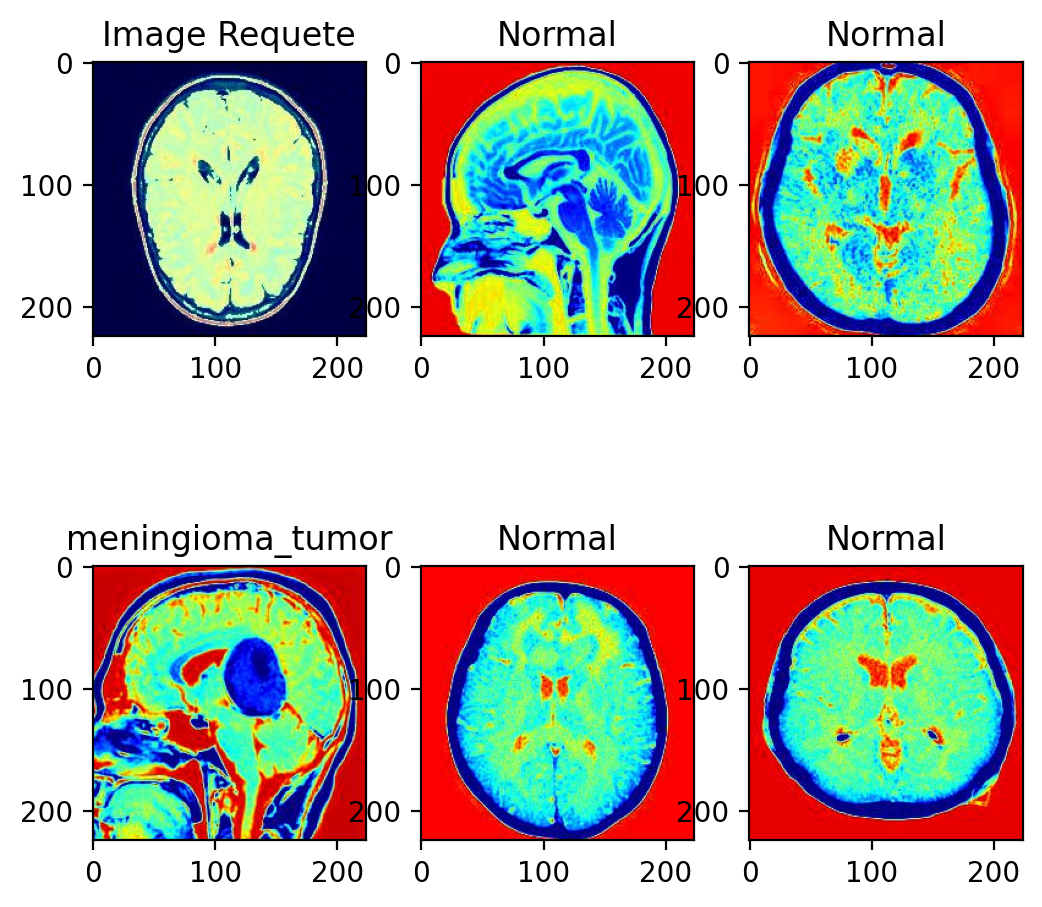

In [ ]:
img_requete = image.imread('/content/requested_images/requested_image_1.jpg')
plt.imshow(img_requete)
distanes_CBIR=CBIR_Recherche(img_requete,index_Matrix)
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(X[distanes_CBIR[i][1]])
  ax1.set_title('%s' %(y[distanes_CBIR[i][1]]))

## **Recherche par histogramme**

In [ ]:
from math import ceil

def hsvHistogramFeatures(image):
    """ img: image à quantifier dans un espace couleur hsv en 8x2x2 cases identiques
    sortie: vecteur 1x32 indiquant les entités extraites de l'histogramme dans l'espace hsv
    L'Histogramme dans l'espace de couleur HSV est obtenu utilisant une
    quantification par niveau:
    8 pour H(hue), 2 pour S(saturation), et 2 pour V(Value).
    Le vecteur descripteur de taille 1x32 est calculé et normalisé """
    [rows,cols,dd] = np.shape(image)
    # convertir l'image RGB en HSV.
    imageHSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hist = cv2.calcHist([imageHSV], [0,1,2],None, [8, 2, 2],[0,180,0,256,0,256])
    hist=hist.flatten()
    hist/=np.sum(hist)
    return hist.reshape(-1)

In [ ]:
def getFeatures(img, fsize):
  # fonction pour créer le vecteur descripteur
    features = np.zeros((fsize-1,1))
    if(fsize >= 7):
        features = color_Moments(img)
    if(fsize >= 39):
        features = np.concatenate((features, hsvHistogramFeatures(img)), axis=None)
    return features

In [ ]:
features = CBIR_Indexation(39)

Debut dIndexation
Fin dIndexation


In [ ]:
img_requete = image.imread('/content/requested_images/requested_image_0.jpg')
#plt.imshow(img_requete)
distanes_CBIR=CBIR_Recherche(img_requete,features)
print(distanes_CBIR)

[(0.3960502468544115, 5480), (0.5012227612773031, 1421), (0.6109371600594183, 3809), (0.6341656176711523, 5014), (0.6490261963683142, 4787), (0.6749348623699626, 3194), (0.6949318226763177, 1645), (0.7107427288901929, 3462), (0.7191309922506034, 1635), (0.7431206340351388, 4834), (0.750396952216082, 3459), (0.7560041732797024, 3548), (0.7629415861999315, 816), (0.7745878626699458, 3025), (0.7748421289275915, 437), (0.7812323454563911, 3560), (0.7840824877482625, 5462), (0.7921335101366215, 1114), (0.8308403997397614, 1911), (0.847544759851086, 1390), (0.8484283917754337, 4441), (0.8595585574476396, 4885), (0.8719389120433358, 486), (0.8928666022059053, 1428), (0.8994586295778855, 3601), (0.9051988595096117, 846), (0.9300645698779614, 1332), (0.9388387495998969, 1479), (0.9397718338901645, 68), (0.9402869238968949, 1697), (0.9408989869060453, 1816), (0.9525046803888635, 641), (0.9561487580526803, 747), (0.9668803855619504, 1776), (0.9754217192470175, 4257), (0.975540975161904, 3240), (0

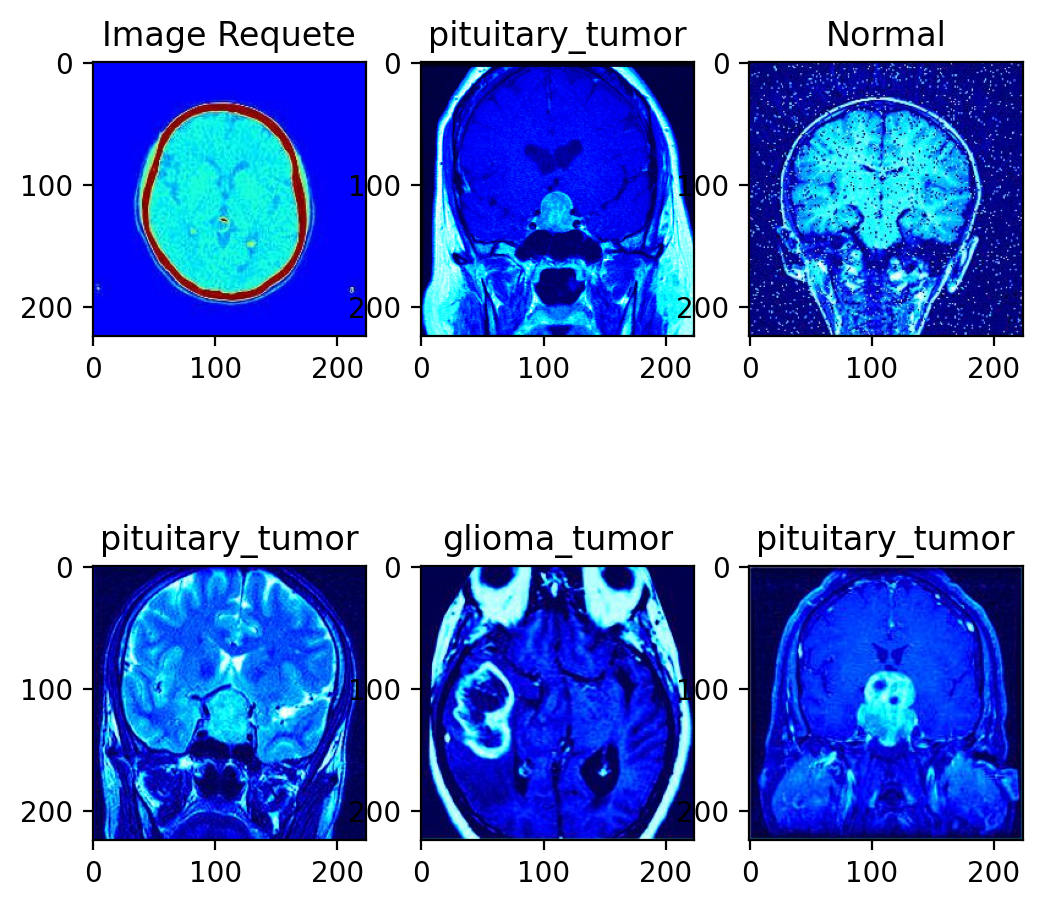

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(X[distanes_CBIR[i][1]])
  ax1.set_title('%s' %(y[distanes_CBIR[i][1]]))

In [ ]:
img_requete = image.imread('/content/requested_images/requested_image_1.jpg')
#plt.imshow(img_requete)
distanes_CBIR=CBIR_Recherche(img_requete,features)
print(distanes_CBIR)
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(X[distanes_CBIR[i][1]])
  ax1.set_title('%s' %(y[distanes_CBIR[i][1]]))

## **Recherche par texture**

In [ ]:
from skimage.feature import graycomatrix, graycoprops
def  textureFeatures(img):
    """Basée sur l'analyse de textures par la GLCM (Gray-Level Co-Occurrence Matrix)
    Le vecteur de taille 1x4 contiendra [Contrast, Correlation, Energy, Homogeneity]
    """
    im = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    v = []
    glcm = graycomatrix(im, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    v.append(graycoprops(glcm, 'contrast')[0][0])
    v.append(graycoprops(glcm, 'correlation')[0][0])
    v.append(graycoprops(glcm, 'energy')[0][0])
    v.append(graycoprops(glcm, 'homogeneity')[0][0])
    v /= np.sum(v)
    return v

In [ ]:
def getFeatures(img, fsize):
    # fonction pour créer le vecteur descripteur
    features = np.zeros((fsize-1,1))
    if(fsize >= 7):
        features = color_Moments(img)
    if(fsize >= 39):
        features = np.concatenate((features, hsvHistogramFeatures(img)), axis=None)
    if(fsize >= 43):
        features = np.concatenate((features, textureFeatures(img)), axis=None)
    features /=np.sum(features)
    return features

In [ ]:
features = CBIR_Indexation(43)

In [ ]:
np.array(features).shape

In [ ]:
img_requete = image.imread('/content/requested_images/requested_image_0.jpg')
#plt.imshow(img_requete)
distanes_CBIR=CBIR_Recherche(img_requete,features)
print(distanes_CBIR)

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.cvtColor(img_requete, cv2.COLOR_RGB2GRAY)
cv2_imshow(img)

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(X[distanes_CBIR[i][1]])
  ax1.set_title('%s' %(y[distanes_CBIR[i][1]]))

## **Recherche par Forme**

In [ ]:
def shapeFeatures(img):
    # https://www.pyimagesearch.com/2014/10/27/opencv-shape-descriptor-hu-moments-example/
    im = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    shapeFeat = cv2.HuMoments(cv2.moments(im)).flatten()
    shapeFeat /= np.mean(shapeFeat)
    return shapeFeat
def getFeatures(img, fsize):
    features = np.zeros((fsize-1,1))
    if(fsize >= 7):
        features = color_Moments(img)
    if(fsize >= 39):
        features = np.concatenate((features, hsvHistogramFeatures(img)), axis=None)
    if(fsize >= 43):
        features = np.concatenate((features, textureFeatures(img)), axis=None)
    if(fsize >= 50):
        features = np.concatenate((features, shapeFeatures(img)), axis=None)
    features /=np.sum(features)
    return features
# Indexation avec les nouveaux vecteurs
features = CBIR_Indexation(50)

# recherche et affichage sur la première image
img_requete = image.imread('/content/requested_images/requested_image_0.jpg')
#plt.imshow(img_requete)
distanes_CBIR=CBIR_Recherche(img_requete,features)
print(distanes_CBIR)

fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(X[distanes_CBIR[i][1]])
  ax1.set_title('%s' %(y[distanes_CBIR[i][1]]))

## **Robustesse vis-à-vis des transformations géométriques (SIFT)**

In [ ]:
features_50 = CBIR_Indexation(50)
features_43 = CBIR_Indexation(43)
features_6 = CBIR_Indexation(6)

In [ ]:
img_requete = image.imread('/content/requested_images/requested_image_0.jpg')
# Faire une rotation de l'image requéte
import scipy.ndimage as ndimage
img_requete_rotée = ndimage.rotate(img_requete, 10, reshape=True)

#plt.imshow(img_requete)
distanes_CBIR=CBIR_Recherche(img_requete_rotée,features_50)

fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete_rotée)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(X[distanes_CBIR[i][1]])
  ax1.set_title('%s' %(y[distanes_CBIR[i][1]]))

In [ ]:
import matplotlib.pyplot as plt

img_requete = image.imread('/content/requested_images/requested_image_0.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img_requete, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blurring to reduce noise
#blurred_image = cv.GaussianBlur(img_requete, (5, 5), 0)

# Apply Non-Local Means denoising to further reduce noise
#denoised_image = cv.fastNlMeansDenoising(blurred_image, None, 10, 7, 21)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect and compute keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(img_requete, None)
print(descriptors.shape) # renvoie le nombre de points clés détectés suivi par la dimension du vecteur SIFT par point clé






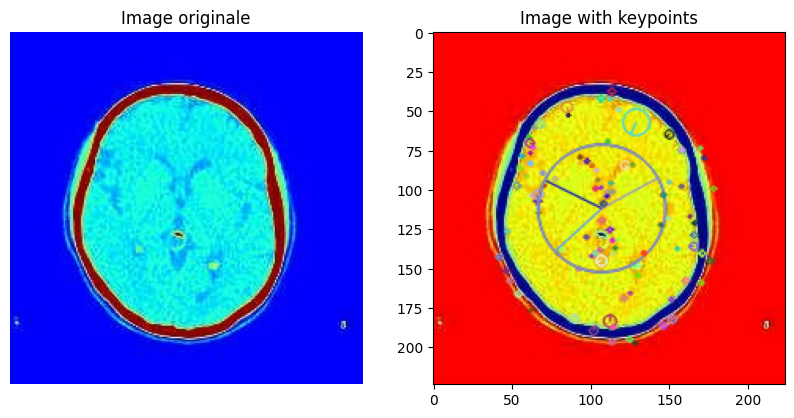

In [ ]:
# Draw the keypoints on the image
image_with_keypoints=cv2.drawKeypoints(img_requete, keypoints, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Affichage de l'image originale
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_requete, cmap="gray")
plt.title("Image originale")
plt.axis("off")

plt.subplot(1,2,2)
# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Image with keypoints")
plt.show()

# **Classification**

Extraction des caractéristiques pour toutes les images...
Traitement de l'image 0/5598
Traitement de l'image 500/5598
Traitement de l'image 1000/5598
Traitement de l'image 1500/5598
Traitement de l'image 2000/5598
Traitement de l'image 2500/5598
Traitement de l'image 3000/5598
Traitement de l'image 3500/5598
Traitement de l'image 4000/5598
Traitement de l'image 4500/5598
Traitement de l'image 5000/5598
Traitement de l'image 5500/5598

Shape des features extraites: (5598, 49)
Nombre de caractéristiques par image: 49

Classes: ['Normal' 'glioma_tumor' 'meningioma_tumor' 'pituitary_tumor']

Taille du train set: 4198
Taille du test set: 1400

Entraînement du modèle: Random Forest

📊 MÉTRIQUES DE PERFORMANCE:
  • Accuracy:  0.6757
  • Precision: 0.6717
  • Recall:    0.6757
  • F1-Score:  0.6722
  • AUC:       0.8779

📋 Rapport de classification détaillé:
                  precision    recall  f1-score   support

          Normal       0.76      0.81      0.79       350
    glioma_tumor    

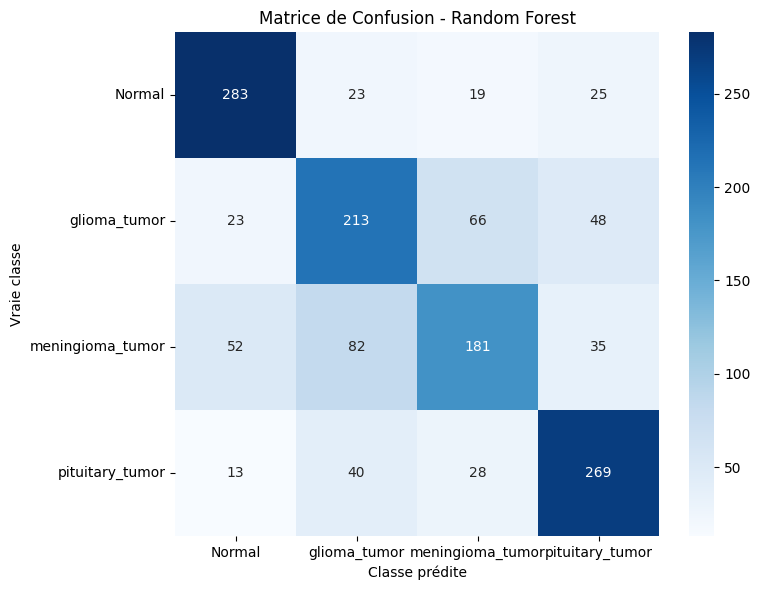


Entraînement du modèle: SVM

📊 MÉTRIQUES DE PERFORMANCE:
  • Accuracy:  0.4764
  • Precision: 0.4843
  • Recall:    0.4764
  • F1-Score:  0.4771

📋 Rapport de classification détaillé:
                  precision    recall  f1-score   support

          Normal       0.56      0.46      0.50       350
    glioma_tumor       0.42      0.54      0.47       350
meningioma_tumor       0.43      0.41      0.42       350
 pituitary_tumor       0.53      0.50      0.52       350

        accuracy                           0.48      1400
       macro avg       0.48      0.48      0.48      1400
    weighted avg       0.48      0.48      0.48      1400



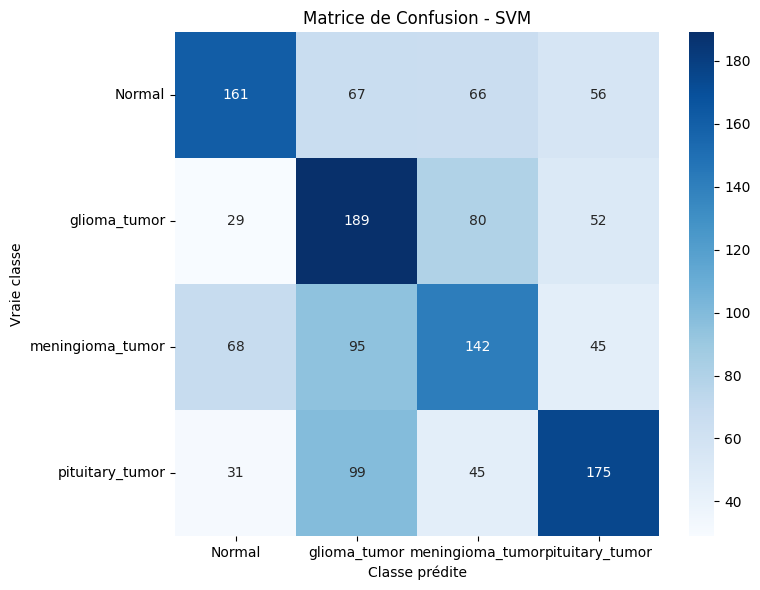


Entraînement du modèle: KNN

📊 MÉTRIQUES DE PERFORMANCE:
  • Accuracy:  0.5250
  • Precision: 0.5311
  • Recall:    0.5250
  • F1-Score:  0.5262
  • AUC:       0.7607

📋 Rapport de classification détaillé:
                  precision    recall  f1-score   support

          Normal       0.64      0.55      0.59       350
    glioma_tumor       0.46      0.55      0.50       350
meningioma_tumor       0.45      0.42      0.43       350
 pituitary_tumor       0.58      0.58      0.58       350

        accuracy                           0.53      1400
       macro avg       0.53      0.53      0.53      1400
    weighted avg       0.53      0.53      0.53      1400



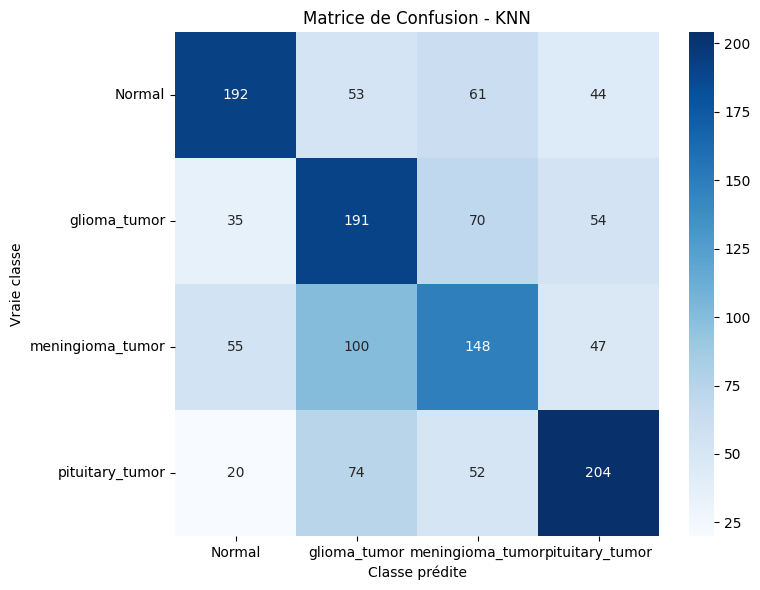


TABLEAU COMPARATIF DES PERFORMANCES
               accuracy  precision    recall  f1_score       auc
Random Forest  0.675714   0.671737  0.675714  0.672214  0.877912
SVM            0.476429   0.484264  0.476429  0.477112       NaN
KNN            0.525000   0.531089  0.525000  0.526175  0.760747


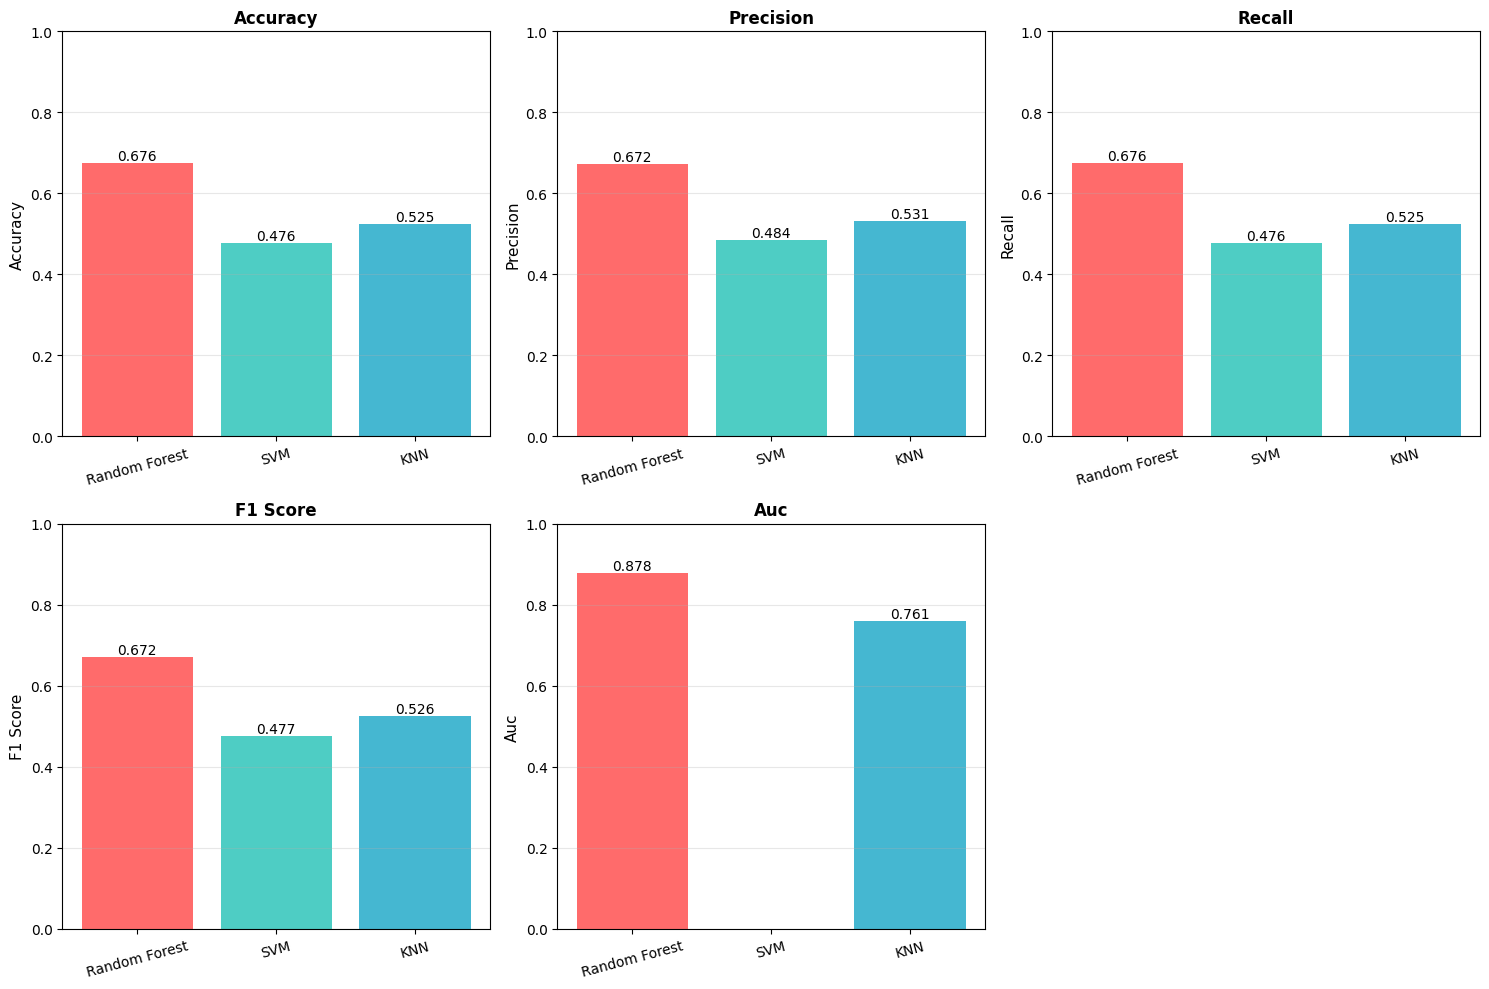

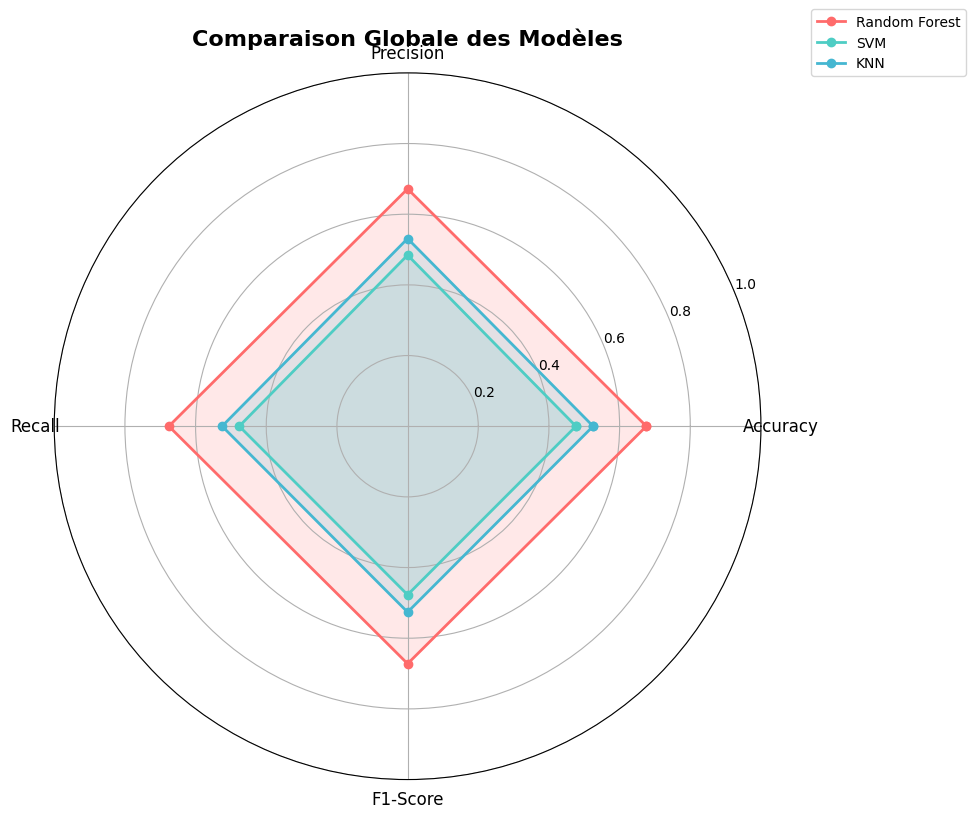


🏆 Meilleur modèle: Random Forest
   F1-Score: 0.6722


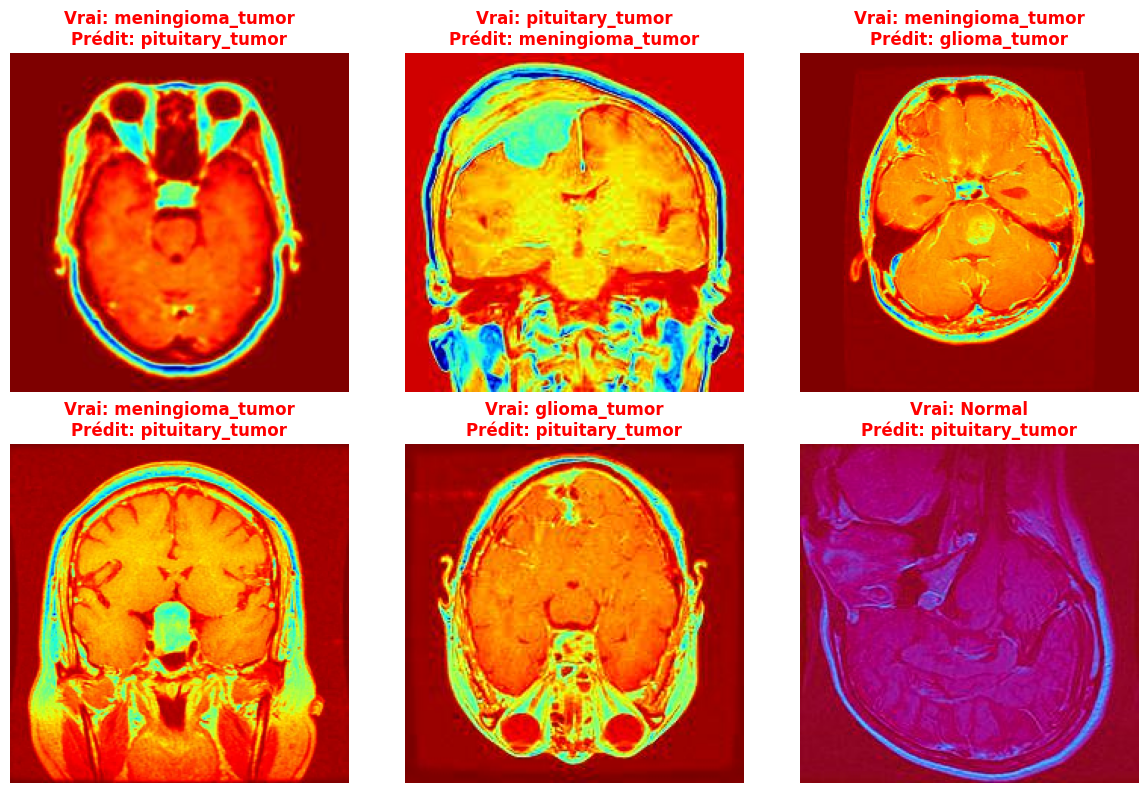


✅ Classification terminée avec succès!


In [ ]:
# Classification des tumeurs cérébrales avec features extraites

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ========== EXTRACTION DES CARACTÉRISTIQUES ==========

def color_Moments(img):
    """Extrait les moments statistiques de couleur (moyenne et std pour R, G, B)"""
    R = img[..., 0]
    G = img[..., 1]
    B = img[..., 2]
    colorFeatures = [np.mean(R), np.std(R), np.mean(G), np.std(G), np.mean(B), np.std(B)]
    colorFeatures = np.array(colorFeatures)
    colorFeatures /= (np.mean(colorFeatures) + 1e-7)  # Éviter division par zéro
    return colorFeatures

def hsvHistogramFeatures(image):
    """Calcule l'histogramme dans l'espace HSV (8x2x2)"""
    imageHSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hist = cv2.calcHist([imageHSV], [0,1,2], None, [8, 2, 2], [0,180,0,256,0,256])
    hist = hist.flatten()
    hist /= (np.sum(hist) + 1e-7)
    return hist

def textureFeatures(img):
    """Extrait les caractéristiques de texture avec GLCM"""
    from skimage.feature import graycomatrix, graycoprops
    im = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    glcm = graycomatrix(im, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    v = np.array([
        graycoprops(glcm, 'contrast')[0][0],
        graycoprops(glcm, 'correlation')[0][0],
        graycoprops(glcm, 'energy')[0][0],
        graycoprops(glcm, 'homogeneity')[0][0]
    ])
    v /= (np.sum(v) + 1e-7)
    return v

def shapeFeatures(img):
    """Extrait les moments de Hu pour la forme"""
    im = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    shapeFeat = cv2.HuMoments(cv2.moments(im)).flatten()
    shapeFeat /= (np.mean(shapeFeat) + 1e-7)
    return shapeFeat

def extract_all_features(img):
    """Extrait toutes les caractéristiques d'une image"""
    features = []

    # Couleur (6 features)
    features.extend(color_Moments(img))

    # Histogramme HSV (32 features)
    features.extend(hsvHistogramFeatures(img))

    # Texture (4 features)
    features.extend(textureFeatures(img))

    # Forme (7 features)
    features.extend(shapeFeatures(img))

    features = np.array(features)
    features /= (np.sum(features) + 1e-7)

    return features

# ========== PRÉPARATION DES DONNÉES ==========

print("Extraction des caractéristiques pour toutes les images...")
X_features = []
for i, img in enumerate(X):
    if i % 500 == 0:
        print(f"Traitement de l'image {i}/{len(X)}")
    features = extract_all_features(img)
    X_features.append(features)

X_features = np.array(X_features)
print(f"\nShape des features extraites: {X_features.shape}")
print(f"Nombre de caractéristiques par image: {X_features.shape[1]}")

# Encodage des labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"\nClasses: {le.classes_}")

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

print(f"\nTaille du train set: {X_train.shape[0]}")
print(f"Taille du test set: {X_test.shape[0]}")

# ========== ENTRAÎNEMENT DES MODÈLES ==========

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'SVM': SVC(kernel='rbf', C=10, gamma='scale', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
}

results = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Entraînement du modèle: {name}")
    print(f"{'='*50}")

    # Entraînement
    model.fit(X_train, y_train)

    # Prédictions
    y_pred = model.predict(X_test)

    # Évaluation avec métriques multiples
    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # ROC AUC (nécessite les probabilités)
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
    else:
        auc = None

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc
    }

    print(f"\n📊 MÉTRIQUES DE PERFORMANCE:")
    print(f"  • Accuracy:  {accuracy:.4f}")
    print(f"  • Precision: {precision:.4f}")
    print(f"  • Recall:    {recall:.4f}")
    print(f"  • F1-Score:  {f1:.4f}")
    if auc:
        print(f"  • AUC:       {auc:.4f}")

    print(f"\n📋 Rapport de classification détaillé:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Matrice de Confusion - {name}')
    plt.ylabel('Vraie classe')
    plt.xlabel('Classe prédite')
    plt.tight_layout()
    plt.show()

# ========== COMPARAISON DES MODÈLES ==========

# Créer un DataFrame pour mieux visualiser
import pandas as pd

metrics_df = pd.DataFrame(results).T
print(f"\n{'='*70}")
print("TABLEAU COMPARATIF DES PERFORMANCES")
print(f"{'='*70}")
print(metrics_df.to_string())
print(f"{'='*70}")

# Visualisation des métriques multiples
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, metric in enumerate(metrics):
    if idx < 5:
        row = idx // 3
        col = idx % 3
        ax = axes[row, col]

        values = [results[model][metric] if results[model][metric] is not None else 0
                  for model in results.keys()]
        bars = ax.bar(results.keys(), values, color=colors)
        ax.set_ylabel(metric.replace('_', ' ').title(), fontsize=11)
        ax.set_title(f'{metric.replace("_", " ").title()}', fontsize=12, fontweight='bold')
        ax.set_ylim([0, 1])
        ax.grid(axis='y', alpha=0.3)

        # Ajouter les valeurs sur les barres
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.3f}',
                       ha='center', va='bottom', fontsize=10)

        ax.tick_params(axis='x', rotation=15)

# Supprimer le dernier subplot vide
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Graphique radar pour comparaison globale
from math import pi

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for idx, (model_name, metrics) in enumerate(results.items()):
    values = [metrics['accuracy'], metrics['precision'],
              metrics['recall'], metrics['f1_score']]
    values += values[:1]

    ax.plot(angles, values, 'o-', linewidth=2, label=model_name, color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=12)
ax.set_ylim(0, 1)
ax.set_title('Comparaison Globale des Modèles', size=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

# ========== PRÉDICTION SUR UNE NOUVELLE IMAGE ==========

def predict_image(img, model, label_encoder):
    """Prédit la classe d'une image"""
    features = extract_all_features(img).reshape(1, -1)
    pred_encoded = model.predict(features)[0]
    pred_label = label_encoder.inverse_transform([pred_encoded])[0]

    # Probabilités (si disponible)
    if hasattr(model, 'predict_proba'):
        proba = model.predict_proba(features)[0]
        return pred_label, proba
    else:
        return pred_label, None

# Exemple de prédiction avec le meilleur modèle
best_model_name = max(results, key=lambda x: results[x]['f1_score'])
best_model = models[best_model_name]

print(f"\n{'='*50}")
print(f"🏆 Meilleur modèle: {best_model_name}")
print(f"   F1-Score: {results[best_model_name]['f1_score']:.4f}")
print(f"{'='*50}")

# Tester sur quelques images du test set
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

for i in range(6):
    idx = np.random.randint(0, len(X_test))

    # Retrouver l'image originale correspondante
    test_indices = np.where(np.isin(range(len(X)),
                           np.arange(len(X_train), len(X))))[0]
    img_idx = test_indices[idx] if idx < len(test_indices) else idx

    pred_label, proba = predict_image(X[img_idx], best_model, le)
    true_label = le.inverse_transform([y_test[idx]])[0]

    axes[i].imshow(X[img_idx])
    axes[i].axis('off')

    color = 'green' if pred_label == true_label else 'red'
    axes[i].set_title(f'Vrai: {true_label}\nPrédit: {pred_label}',
                      color=color, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Classification terminée avec succès!")

🔄 Extraction des caractéristiques pour toutes les images...
   Traitement: 0/5598 images
   Traitement: 500/5598 images
   Traitement: 1000/5598 images
   Traitement: 1500/5598 images
   Traitement: 2000/5598 images
   Traitement: 2500/5598 images
   Traitement: 3000/5598 images
   Traitement: 3500/5598 images
   Traitement: 4000/5598 images
   Traitement: 4500/5598 images
   Traitement: 5000/5598 images
   Traitement: 5500/5598 images

✅ Shape des features: (5598, 299)
   Nombre de caractéristiques: 299
✅ Correspondance vérifiée: 5598 images = 5598 labels

📋 Classes détectées: ['Normal' 'glioma_tumor' 'meningioma_tumor' 'pituitary_tumor']
   Distribution: [1398 1400 1400 1400]

📊 Taille du train set: 4478
   Taille du test set: 1120

🚀 ENTRAÎNEMENT DES MODÈLES OPTIMISÉS

──────────────────────────────────────────────────────────────────────
📈 Modèle: Random Forest
──────────────────────────────────────────────────────────────────────
   Cross-Validation F1-Score: 0.6685 (+/- 0.0151)



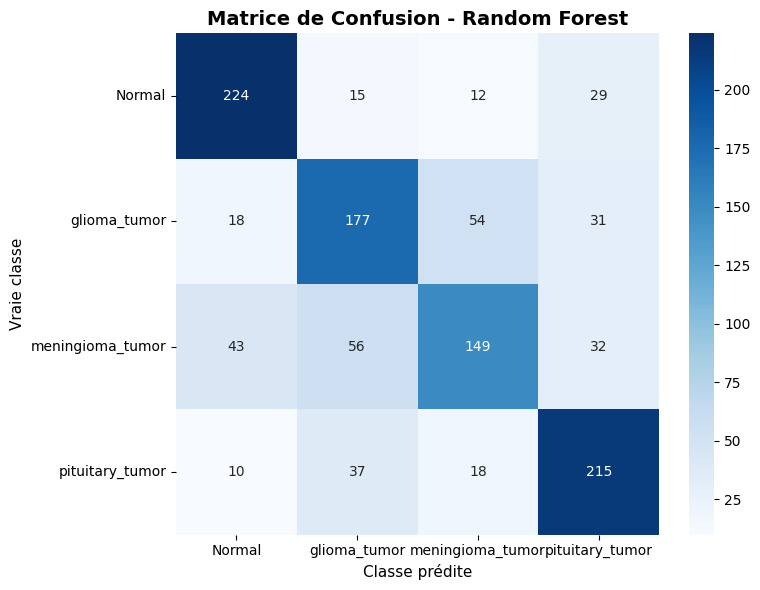


──────────────────────────────────────────────────────────────────────
📈 Modèle: Gradient Boosting
──────────────────────────────────────────────────────────────────────
   Cross-Validation F1-Score: 0.6960 (+/- 0.0122)

   📊 MÉTRIQUES SUR TEST SET:
      • Accuracy:  0.7071
      • Precision: 0.7061
      • Recall:    0.7071
      • F1-Score:  0.7062
      • AUC:       0.8950

   📋 Rapport détaillé par classe:
                  precision    recall  f1-score   support

          Normal     0.8327    0.8179    0.8252       280
    glioma_tumor     0.6630    0.6464    0.6546       280
meningioma_tumor     0.6000    0.5786    0.5891       280
 pituitary_tumor     0.7285    0.7857    0.7560       280

        accuracy                         0.7071      1120
       macro avg     0.7061    0.7071    0.7062      1120
    weighted avg     0.7061    0.7071    0.7062      1120



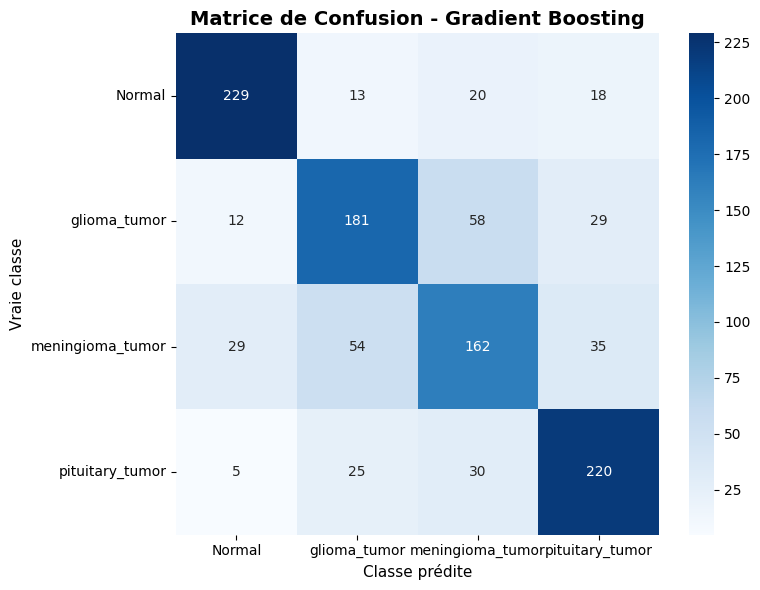


──────────────────────────────────────────────────────────────────────
📈 Modèle: SVM
──────────────────────────────────────────────────────────────────────
   Cross-Validation F1-Score: 0.6659 (+/- 0.0202)

   📊 MÉTRIQUES SUR TEST SET:
      • Accuracy:  0.6964
      • Precision: 0.6958
      • Recall:    0.6964
      • F1-Score:  0.6936
      • AUC:       0.8923

   📋 Rapport détaillé par classe:
                  precision    recall  f1-score   support

          Normal     0.7315    0.8464    0.7848       280
    glioma_tumor     0.6412    0.6893    0.6644       280
meningioma_tumor     0.6349    0.5464    0.5873       280
 pituitary_tumor     0.7756    0.7036    0.7378       280

        accuracy                         0.6964      1120
       macro avg     0.6958    0.6964    0.6936      1120
    weighted avg     0.6958    0.6964    0.6936      1120



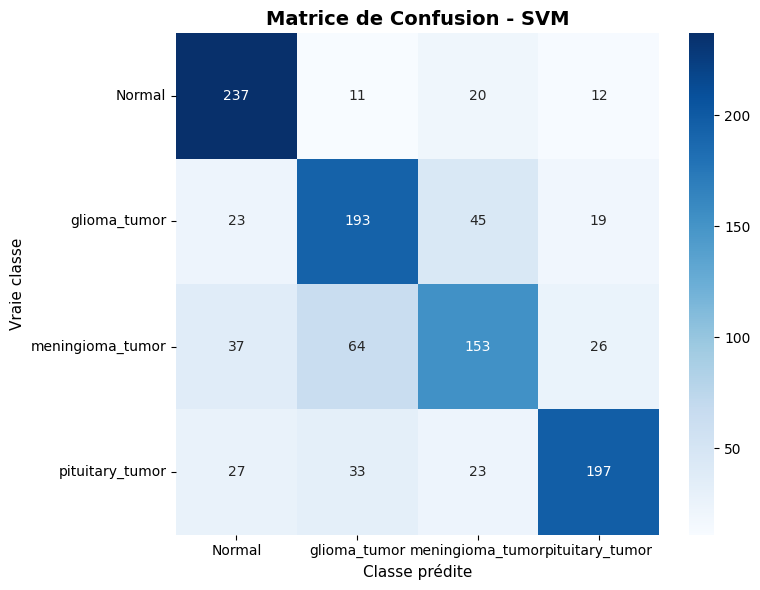


──────────────────────────────────────────────────────────────────────
📈 Modèle: KNN
──────────────────────────────────────────────────────────────────────
   Cross-Validation F1-Score: 0.6006 (+/- 0.0229)

   📊 MÉTRIQUES SUR TEST SET:
      • Accuracy:  0.6170
      • Precision: 0.6282
      • Recall:    0.6170
      • F1-Score:  0.6201
      • AUC:       0.8341

   📋 Rapport détaillé par classe:
                  precision    recall  f1-score   support

          Normal     0.8070    0.6571    0.7244       280
    glioma_tumor     0.5583    0.5643    0.5613       280
meningioma_tumor     0.5195    0.5714    0.5442       280
 pituitary_tumor     0.6279    0.6750    0.6506       280

        accuracy                         0.6170      1120
       macro avg     0.6282    0.6170    0.6201      1120
    weighted avg     0.6282    0.6170    0.6201      1120



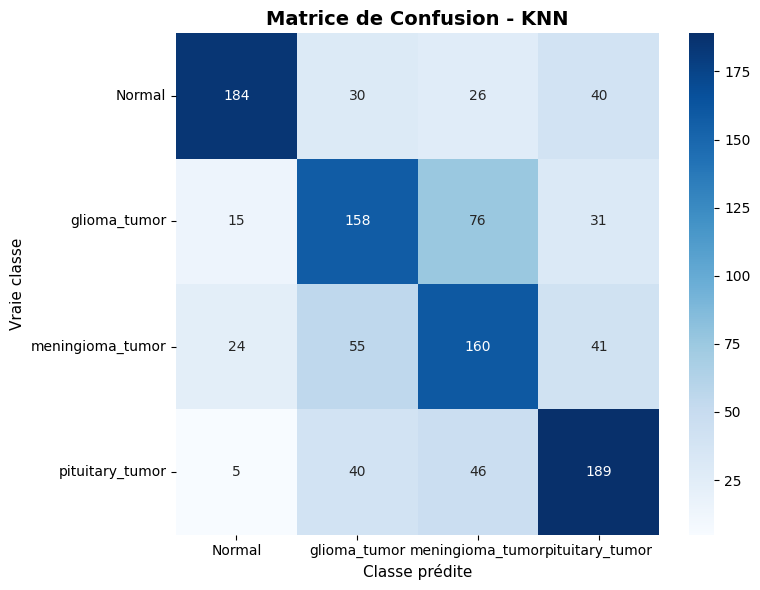


🎯 CRÉATION D'UN MODÈLE ENSEMBLE (Voting)


In [ ]:
# Classification optimisée des tumeurs cérébrales

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import pi

# ========== EXTRACTION AMÉLIORÉE DES CARACTÉRISTIQUES ==========

def color_Moments(img):
    """Extrait les moments statistiques de couleur"""
    R = img[..., 0]
    G = img[..., 1]
    B = img[..., 2]

    # Ajouter des moments d'ordre supérieur
    colorFeatures = [
        np.mean(R), np.std(R), np.var(R),
        np.mean(G), np.std(G), np.var(G),
        np.mean(B), np.std(B), np.var(B)
    ]

    colorFeatures = np.array(colorFeatures)
    # Normalisation plus robuste
    mean_val = np.mean(colorFeatures)
    if mean_val > 1e-7:
        colorFeatures /= mean_val
    return colorFeatures

def hsvHistogramFeatures(image):
    """Calcule l'histogramme dans l'espace HSV avec quantification améliorée"""
    imageHSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # Augmenter la résolution: 16x4x4 au lieu de 8x2x2
    hist = cv2.calcHist([imageHSV], [0,1,2], None, [16, 4, 4], [0,180,0,256,0,256])
    hist = hist.flatten()
    hist /= (np.sum(hist) + 1e-7)
    return hist

def textureFeatures(img):
    """Extrait les caractéristiques de texture avec GLCM multi-angles"""
    from skimage.feature import graycomatrix, graycoprops
    im = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Utiliser plusieurs angles et distances
    distances = [1, 3, 5]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

    features = []
    for dist in distances:
        glcm = graycomatrix(im, distances=[dist], angles=angles,
                           levels=256, symmetric=True, normed=True)

        for prop in ['contrast', 'correlation', 'energy', 'homogeneity']:
            prop_values = graycoprops(glcm, prop)
            features.extend([np.mean(prop_values), np.std(prop_values)])

    features = np.array(features)
    features /= (np.sum(features) + 1e-7)
    return features

def shapeFeatures(img):
    """Extrait les moments de Hu pour la forme"""
    im = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    shapeFeat = cv2.HuMoments(cv2.moments(im)).flatten()
    # Log-transform pour Hu moments (plus stable)
    shapeFeat = -np.sign(shapeFeat) * np.log10(np.abs(shapeFeat) + 1e-7)
    return shapeFeat

def edgeFeatures(img):
    """Extrait des caractéristiques de contours"""
    im = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Canny edge detection
    edges = cv2.Canny(im, 50, 150)

    # Statistiques sur les contours
    edge_features = [
        np.mean(edges),
        np.std(edges),
        np.sum(edges > 0) / edges.size  # Densité des contours
    ]

    return np.array(edge_features)

def extract_all_features(img):
    """Extrait toutes les caractéristiques d'une image"""
    features = []

    # Couleur (9 features)
    features.extend(color_Moments(img))

    # Histogramme HSV (256 features)
    features.extend(hsvHistogramFeatures(img))

    # Texture (24 features)
    features.extend(textureFeatures(img))

    # Forme (7 features)
    features.extend(shapeFeatures(img))

    # Contours (3 features)
    features.extend(edgeFeatures(img))

    features = np.array(features)

    return features

# ========== PRÉPARATION DES DONNÉES ==========

print("🔄 Extraction des caractéristiques pour toutes les images...")
X_features = []
for i, img in enumerate(X):
    if i % 500 == 0:
        print(f"   Traitement: {i}/{len(X)} images")
    try:
        features = extract_all_features(img)
        X_features.append(features)
    except Exception as e:
        print(f"   ⚠️ Erreur sur l'image {i}: {e}")
        continue

X_features = np.array(X_features)
print(f"\n✅ Shape des features: {X_features.shape}")
print(f"   Nombre de caractéristiques: {X_features.shape[1]}")

# Vérification de correspondance
assert len(X_features) == len(y), "❌ Nombre de features != nombre de labels!"
print(f"✅ Correspondance vérifiée: {len(X_features)} images = {len(y)} labels\n")

# Encodage des labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"📋 Classes détectées: {le.classes_}")
print(f"   Distribution: {np.bincount(y_encoded)}\n")

# Division train/test stratifiée
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# NORMALISATION (très important!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"📊 Taille du train set: {X_train_scaled.shape[0]}")
print(f"   Taille du test set: {X_test_scaled.shape[0]}\n")

# ========== MODÈLES OPTIMISÉS AVEC HYPERPARAMÈTRES ==========

models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=150,
        learning_rate=0.1,
        max_depth=5,
        min_samples_split=5,
        random_state=42
    ),
    'SVM': SVC(
        kernel='rbf',
        C=100,
        gamma='scale',
        random_state=42,
        probability=True,
        class_weight='balanced'
    ),
    'KNN': KNeighborsClassifier(
        n_neighbors=7,
        weights='distance',
        metric='minkowski',
        n_jobs=-1
    )
}

results = {}

print("="*70)
print("🚀 ENTRAÎNEMENT DES MODÈLES OPTIMISÉS")
print("="*70)

for name, model in models.items():
    print(f"\n{'─'*70}")
    print(f"📈 Modèle: {name}")
    print(f"{'─'*70}")

    # Validation croisée sur train set
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1_weighted')
    print(f"   Cross-Validation F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    # Entraînement
    model.fit(X_train_scaled, y_train)

    # Prédictions
    y_pred = model.predict(X_test_scaled)

    # Évaluation avec métriques multiples
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # ROC AUC
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_scaled)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
    else:
        auc = None

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc,
        'cv_score': cv_scores.mean()
    }

    print(f"\n   📊 MÉTRIQUES SUR TEST SET:")
    print(f"      • Accuracy:  {accuracy:.4f}")
    print(f"      • Precision: {precision:.4f}")
    print(f"      • Recall:    {recall:.4f}")
    print(f"      • F1-Score:  {f1:.4f}")
    if auc:
        print(f"      • AUC:       {auc:.4f}")

    print(f"\n   📋 Rapport détaillé par classe:")
    print(classification_report(y_test, y_pred, target_names=le.classes_, digits=4))

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Matrice de Confusion - {name}', fontweight='bold', fontsize=14)
    plt.ylabel('Vraie classe', fontsize=11)
    plt.xlabel('Classe prédite', fontsize=11)
    plt.tight_layout()
    plt.show()

# ========== ENSEMBLE VOTING CLASSIFIER ==========

print(f"\n{'='*70}")
print("🎯 CRÉATION D'UN MODÈLE ENSEMBLE (Voting)")
print(f"{'='*70}")

voting_clf = VotingClassifier(
    estimators=[
        ('rf', models['Random Forest']),
        ('gb', models['Gradient Boosting']),
        ('svm', models['SVM'])
    ],
    voting='soft',
    n_jobs=-1
)

voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)

# Évaluation du voting
accuracy_voting = accuracy_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')

y_proba_voting = voting_clf.predict_proba(X_test_scaled)
auc_voting = roc_auc_score(y_test, y_proba_voting, multi_class='ovr', average='weighted')

results['Voting Ensemble'] = {
    'accuracy': accuracy_voting,
    'precision': precision_voting,
    'recall': recall_voting,
    'f1_score': f1_voting,
    'auc': auc_voting,
    'cv_score': None
}

print(f"\n   📊 PERFORMANCES DU VOTING ENSEMBLE:")
print(f"      • Accuracy:  {accuracy_voting:.4f}")
print(f"      • Precision: {precision_voting:.4f}")
print(f"      • Recall:    {recall_voting:.4f}")
print(f"      • F1-Score:  {f1_voting:.4f}")
print(f"      • AUC:       {auc_voting:.4f}")

print(f"\n   📋 Rapport détaillé:")
print(classification_report(y_test, y_pred_voting, target_names=le.classes_, digits=4))

# ========== COMPARAISON GLOBALE ==========

metrics_df = pd.DataFrame(results).T
print(f"\n{'='*70}")
print("📊 TABLEAU COMPARATIF COMPLET")
print(f"{'='*70}")
print(metrics_df.to_string())
print(f"{'='*70}\n")

# Visualisation comparative
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc']
colors_palette = plt.cm.Set3(range(len(results)))

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    values = [results[model][metric] if results[model][metric] is not None else 0
              for model in results.keys()]
    bars = ax.bar(range(len(results)), values, color=colors_palette)
    ax.set_ylabel(metric.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_title(f'{metric.replace("_", " ").title()}', fontsize=13, fontweight='bold')
    ax.set_ylim([0, 1.05])
    ax.set_xticks(range(len(results)))
    ax.set_xticklabels(results.keys(), rotation=30, ha='right')
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.3f}',
                   ha='center', va='bottom', fontsize=9, fontweight='bold')

axes[1, 2].axis('off')
plt.tight_layout()
plt.suptitle('Comparaison des Performances - Toutes Métriques',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Graphique radar
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for idx, (model_name, metrics) in enumerate(results.items()):
    values = [metrics['accuracy'], metrics['precision'],
              metrics['recall'], metrics['f1_score']]
    values += values[:1]

    ax.plot(angles, values, 'o-', linewidth=2.5, label=model_name,
            color=colors_palette[idx], markersize=8)
    ax.fill(angles, values, alpha=0.15, color=colors_palette[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=13, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_title('Comparaison Radar des Modèles', size=18, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.1), fontsize=11)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# ========== MEILLEUR MODÈLE ==========

best_model_name = max(results, key=lambda x: results[x]['f1_score'])
best_f1 = results[best_model_name]['f1_score']

print(f"\n{'='*70}")
print(f"🏆 MEILLEUR MODÈLE: {best_model_name}")
print(f"   F1-Score: {best_f1:.4f}")
print(f"{'='*70}\n")

print("✅ Classification optimisée terminée avec succès!")
print("\n💡 CONSEILS POUR AMÉLIORER ENCORE:")
print("   1. Augmenter la taille du dataset")
print("   2. Appliquer du data augmentation")
print("   3. Utiliser un CNN pré-entraîné (ResNet, VGG)")
print("   4. Faire du fine-tuning avec GridSearchCV")
print("   5. Combiner deep learning + features extraites")

In [ ]:
# =========================
# FULL PIPELINE: Handcrafted + SIFT-BoVW
# =========================
import numpy as np, cv2, gc, sys, warnings
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Optional: GLCM features
try:
    from skimage.feature import graycomatrix, graycoprops
except Exception as e:
    raise RuntimeError("Please install scikit-image: pip install scikit-image") from e

# ---------------------------
# 0) Helpers & config
# ---------------------------
SEED = 42
np.random.seed(SEED)

def to_rgb(img):
    """Ensure image is RGB (OpenCV loads as BGR)."""
    if img is None:
        return None
    # Heuristic: if it looks like BGR (uint8, 3 ch), convert to RGB
    if img.ndim == 3 and img.shape[2] == 3:
        # Try detecting if it's already RGB by checking HSV hue distribution—skip for speed.
        # We’ll just convert BGR->RGB safely; double-convert is harmless visually.
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# =========================
# 1) YOUR HANDCRAFTED FEATURES (unchanged, with minor safety)
# =========================
def color_Moments(img):
    R = img[..., 0]; G = img[..., 1]; B = img[..., 2]
    colorFeatures = [
        np.mean(R), np.std(R), np.var(R),
        np.mean(G), np.std(G), np.var(G),
        np.mean(B), np.std(B), np.var(B)
    ]
    colorFeatures = np.array(colorFeatures, dtype=np.float32)
    mean_val = float(np.mean(colorFeatures))
    if mean_val > 1e-7:
        colorFeatures /= mean_val
    return colorFeatures

def hsvHistogramFeatures(image):
    imageHSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hist = cv2.calcHist([imageHSV], [0,1,2], None, [16, 4, 4], [0,180,0,256,0,256])
    hist = hist.flatten().astype(np.float32)
    hist /= (np.sum(hist) + 1e-7)
    return hist

def textureFeatures(img):
    im = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    distances = [1, 3, 5]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    features = []
    for dist in distances:
        glcm = graycomatrix(im, distances=[dist], angles=angles,
                            levels=256, symmetric=True, normed=True)
        for prop in ['contrast', 'correlation', 'energy', 'homogeneity']:
            prop_values = graycoprops(glcm, prop)
            features.extend([np.mean(prop_values), np.std(prop_values)])
    features = np.array(features, dtype=np.float32)
    features /= (np.sum(features) + 1e-7)
    return features

def shapeFeatures(img):
    im = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    shapeFeat = cv2.HuMoments(cv2.moments(im)).flatten().astype(np.float32)
    shapeFeat = -np.sign(shapeFeat) * np.log10(np.abs(shapeFeat) + 1e-7)
    return shapeFeat

def edgeFeatures(img):
    im = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(im, 50, 150)
    edge_features = np.array([
        float(np.mean(edges)),
        float(np.std(edges)),
        float(np.sum(edges > 0) / edges.size)
    ], dtype=np.float32)
    return edge_features

def extract_all_features(img):
    feats = []
    feats.extend(color_Moments(img))       # 9
    feats.extend(hsvHistogramFeatures(img))# 16*4*4 = 256
    feats.extend(textureFeatures(img))     # 24
    feats.extend(shapeFeatures(img))       # 7
    feats.extend(edgeFeatures(img))        # 3
    return np.array(feats, dtype=np.float32)

# =========================
# 2) PREP DATA (X: images, y: labels) → RGB + handcrafted X_features
# =========================
print("🔄 Converting images to RGB (if needed) & extracting handcrafted features...")
X_rgb = []
X_features = []
for i, img in enumerate(X):
    if i % 500 == 0:
        print(f"   {i}/{len(X)}")
    try:
        rgb = to_rgb(img)
        X_rgb.append(rgb)
        feats = extract_all_features(rgb)
        X_features.append(feats)
    except Exception as e:
        print(f"   ⚠️ Error on image {i}: {e}")
        continue

X_features = np.asarray(X_features, dtype=np.float32)
assert len(X_features) == len(y), "❌ Nombre de features != nombre de labels!"
print(f"✅ Handcrafted features shape: {X_features.shape}")

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"📋 Classes: {list(le.classes_)}")
print(f"   Distribution: {np.bincount(y_encoded)}")

# =========================
# 3) SIFT DESCRIPTORS → BoVW
#    (SIFT: cv2.SIFT_create(); BoVW: KMeans codebook + NN assignment)
# =========================
def sift_descriptors(img_rgb):
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    sift = cv2.SIFT_create()  # Lowe 2004; in OpenCV 4.x via SIFT_create
    _kpts, desc = sift.detectAndCompute(gray, None)  # desc: (n_kp, 128)
    return desc

print("🔎 Extracting SIFT descriptors...")
all_desc = []            # pooled sample for KMeans
img_desc_list = []       # per-image desc (for later histogramming)
max_per_image = 200      # cap per image to lighten KMeans

for i, rgb in enumerate(X_rgb):
    if i % 500 == 0:
        print(f"   SIFT {i}/{len(X_rgb)}")
    desc = sift_descriptors(rgb)
    img_desc_list.append(desc)
    if desc is not None and len(desc) > 0:
        if len(desc) > max_per_image:
            idx = np.random.choice(len(desc), size=max_per_image, replace=False)
            all_desc.append(desc[idx])
        else:
            all_desc.append(desc)

if len(all_desc) == 0:
    raise RuntimeError("No SIFT descriptors found in dataset (try lowering contrastThreshold).")

all_desc = np.vstack(all_desc).astype(np.float32)
print("✅ Descriptor pool for KMeans:", all_desc.shape)

# Build codebook (visual vocabulary)
K = 200  # try 100–400; BoVW concept = cluster descriptors into K “visual words”
print(f"🧭 Fitting KMeans codebook (K={K}) ...")
# n_init='auto' is the current recommended default (scikit-learn >=1.4)
kmeans = KMeans(n_clusters=K, n_init='auto', random_state=SEED, verbose=0)
kmeans.fit(all_desc)
centroids = kmeans.cluster_centers_

# Nearest-centroid assignment
nn = NearestNeighbors(n_neighbors=1).fit(centroids)

def bovw_hist(desc, nn_model, K):
    if desc is None or len(desc) == 0:
        h = np.zeros(K, dtype=np.float32)
    else:
        idx = nn_model.kneighbors(desc, return_distance=False).ravel()
        h, _ = np.histogram(idx, bins=np.arange(K+1))
        h = h.astype(np.float32)
    # L2-normalize per image (BoVW convention)
    return normalize(h.reshape(1, -1), norm='l2').ravel()

print("📦 Building BoVW vectors for all images...")
X_bovw = np.vstack([bovw_hist(d, nn, K) for d in img_desc_list]).astype(np.float32)
print("✅ X_bovw shape:", X_bovw.shape)

# =========================
# 4) FUSE FEATURES (BoVW + handcrafted)
# =========================
# Scale handcrafted block only (BoVW already L2-normalized)
scaler_hand = StandardScaler()
X_hand_scaled = scaler_hand.fit_transform(X_features)
X_fused = np.hstack([X_bovw, X_hand_scaled]).astype(np.float32)
print("🔗 Fused features:", X_fused.shape)

# =========================
# 5) TRAIN / EVAL
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X_fused, y_encoded, test_size=0.2, random_state=SEED, stratify=y_encoded
)

clf = LinearSVC(C=1.0, random_state=SEED, dual='auto', max_iter=5000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("\n🎯 Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=list(le.classes_)))

# (Optional) cleanup
del all_desc, img_desc_list
gc.collect()


🔄 Converting images to RGB (if needed) & extracting handcrafted features...


NameError: name 'X' is not defined